## <span style="color:blue">Introduction to computation in physical sciences</span>
### J Wang and A Wang, [github.com/com-py/intro](https://github.com/com-py/intro) 
### Ch08, `p4-entropy`, Entropy of an atom

In [1]:
from numpy.random import random, randint
import matplotlib.pyplot as plt, numpy as np
%matplotlib ipympl

In [2]:
def exchange(L=20):                     # iterate L times
    for _ in range(L):
        donor = randint(0, N)           # random pair
        getor = randint(0, N) 
        while solid[donor] == 0:        # find a nonzero donor
            donor = randint(0, N)
        solid[donor] -= 1               # exchange energy
        solid[getor] += 1

def entropy():                          # entropy of Einstein solid
    Et, E, n, s = sum(solid), 0, 0, 0.  # Et = tot units of energy
    pn = []
    while E < Et:                       # until all units are counted
        cn  = solid.count(n)            # num. of cells with En 
        E = E + cn*n                    # cumul. count
        p = cn/float(N)                 # probability
        if (cn != 0): s -= p*np.log(p)  # entropy/k, 
        pn.append(p)                    # record p
        n = n + 1                       # next energy to sample
    return s, pn

In [3]:
N = 400
solid = [1]*N                           # initialize solid
t, s = [], []
step = 1
for i in range(11):
    si, pn = entropy()
    s.append(si)
    t.append(step)
    step = 2*step                       # double steps each time
    exchange(step)  

<IPython.core.display.Javascript object>


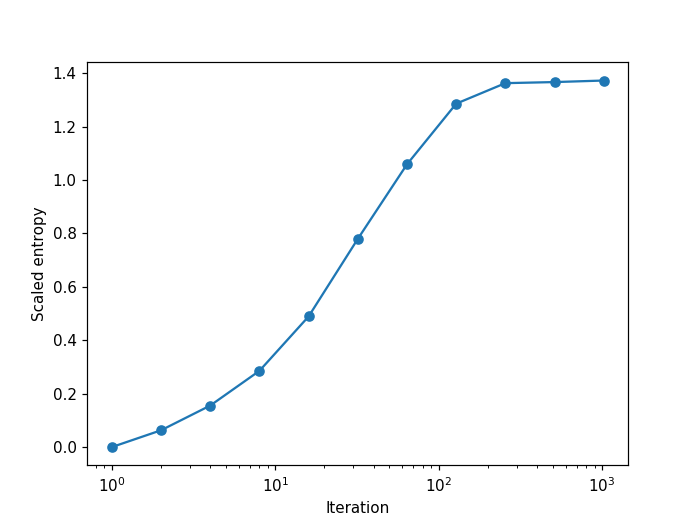

In [4]:
%matplotlib notebook
plt.plot(t, s, '-o')
plt.semilogx()
plt.xlabel('Iteration')
plt.ylabel('Scaled entropy')
plt.show()